In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
df = pd.read_csv('titanic.csv', index_col = False)
df2 = df.copy()
test = pd.read_csv('test_titanic.csv', index_col = False)

In [52]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [53]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [54]:
# Particular columns must be droped since those columns are missing in the test set

df.drop(['adult_male', 'class', 'who', 'deck', 'embark_town', 'alive', 'alone'], axis = 1, inplace = True)

In [55]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [56]:
#Pre-processing

num = round(df[['age']].mean(), 2)
df['age'] = df['age'].fillna(float(num))
df = pd.get_dummies(df, drop_first = True)

In [57]:
X = df.drop('survived', axis = 1).values
y = df['survived'].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [58]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [59]:
print(X_train.shape)
print(X_test.shape)

(623, 8)
(268, 8)


In [60]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense
from numpy.random import seed

from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [71]:
def titanic_model():
    seed(42)
    tf.random.set_seed(42)

    model = Sequential()

    model.add(Dense(units = 8, activation = 'relu'))
    model.add(Dropout(0.2))

    model.add(Dense(units = 4, activation = 'relu'))
    model.add(Dropout(0.2))

    model.add(Dense(units = 4, activation = 'relu'))
    model.add(Dropout(0.2))

    model.add(Dense(units = 1, activation = 'sigmoid'))

    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model
model = titanic_model()
es = EarlyStopping(monitor = "val_loss", mode = "auto", patience = 25)
training = model.fit(X_train, y_train, epochs = 100, batch_size = 16, verbose = 2,
                     validation_data = (X_test, y_test), callbacks = [es])

Train on 623 samples, validate on 268 samples
Epoch 1/100
623/623 - 3s - loss: 0.7276 - accuracy: 0.4318 - val_loss: 0.7104 - val_accuracy: 0.3284
Epoch 2/100
623/623 - 0s - loss: 0.7026 - accuracy: 0.4462 - val_loss: 0.6950 - val_accuracy: 0.5299
Epoch 3/100
623/623 - 0s - loss: 0.6891 - accuracy: 0.5762 - val_loss: 0.6880 - val_accuracy: 0.5709
Epoch 4/100
623/623 - 0s - loss: 0.6808 - accuracy: 0.6308 - val_loss: 0.6867 - val_accuracy: 0.5784
Epoch 5/100
623/623 - 0s - loss: 0.6786 - accuracy: 0.6308 - val_loss: 0.6849 - val_accuracy: 0.5746
Epoch 6/100
623/623 - 0s - loss: 0.6739 - accuracy: 0.6340 - val_loss: 0.6832 - val_accuracy: 0.5746
Epoch 7/100
623/623 - 0s - loss: 0.6694 - accuracy: 0.6356 - val_loss: 0.6817 - val_accuracy: 0.5746
Epoch 8/100
623/623 - 0s - loss: 0.6671 - accuracy: 0.6308 - val_loss: 0.6804 - val_accuracy: 0.5746
Epoch 9/100
623/623 - 0s - loss: 0.6620 - accuracy: 0.6324 - val_loss: 0.6786 - val_accuracy: 0.5746
Epoch 10/100
623/623 - 0s - loss: 0.6584 - ac

Epoch 81/100
623/623 - 0s - loss: 0.4883 - accuracy: 0.7929 - val_loss: 0.4604 - val_accuracy: 0.7910
Epoch 82/100
623/623 - 0s - loss: 0.4794 - accuracy: 0.7978 - val_loss: 0.4603 - val_accuracy: 0.7948
Epoch 83/100
623/623 - 0s - loss: 0.4802 - accuracy: 0.7929 - val_loss: 0.4614 - val_accuracy: 0.7948
Epoch 84/100
623/623 - 0s - loss: 0.4629 - accuracy: 0.8090 - val_loss: 0.4618 - val_accuracy: 0.7873
Epoch 85/100
623/623 - 0s - loss: 0.4722 - accuracy: 0.7817 - val_loss: 0.4600 - val_accuracy: 0.7948
Epoch 86/100
623/623 - 0s - loss: 0.4648 - accuracy: 0.7978 - val_loss: 0.4566 - val_accuracy: 0.7799
Epoch 87/100
623/623 - 0s - loss: 0.4662 - accuracy: 0.8122 - val_loss: 0.4573 - val_accuracy: 0.7948
Epoch 88/100
623/623 - 0s - loss: 0.4527 - accuracy: 0.8010 - val_loss: 0.4548 - val_accuracy: 0.7799
Epoch 89/100
623/623 - 0s - loss: 0.4872 - accuracy: 0.7897 - val_loss: 0.4557 - val_accuracy: 0.7948
Epoch 90/100
623/623 - 0s - loss: 0.4613 - accuracy: 0.7961 - val_loss: 0.4544 - v

In [72]:
print(model.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             multiple                  72        
_________________________________________________________________
dropout_27 (Dropout)         multiple                  0         
_________________________________________________________________
dense_41 (Dense)             multiple                  36        
_________________________________________________________________
dropout_28 (Dropout)         multiple                  0         
_________________________________________________________________
dense_42 (Dense)             multiple                  20        
_________________________________________________________________
dropout_29 (Dropout)         multiple                  0         
_________________________________________________________________
dense_43 (Dense)             multiple                

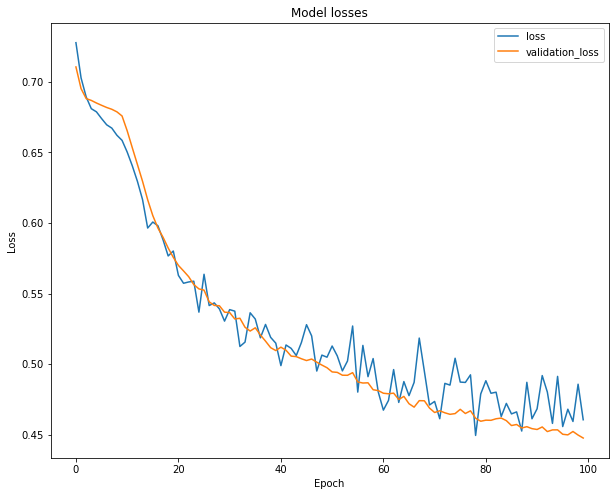

In [62]:
losses = pd.DataFrame(training.history)
plt.figure(figsize = (10, 8))
plt.plot(losses['loss'], label = 'loss')
plt.plot(losses['val_loss'], label = 'validation_loss')
plt.title('Model losses')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

In [73]:
from sklearn.metrics import classification_report, confusion_matrix

prediction = model.predict_classes(X_test)

print(classification_report(y_test, prediction))
print('\n')
print(confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       154
           1       0.85      0.67      0.75       114

    accuracy                           0.81       268
   macro avg       0.82      0.79      0.80       268
weighted avg       0.82      0.81      0.81       268



[[141  13]
 [ 38  76]]


In [64]:
# GridsearchCV

model = KerasClassifier(build_fn = titanic_model, verbose = 0)

batch_size = [16, 32, 64]
epochs = [50, 100]
param_grid = dict(batch_size = batch_size, epochs = epochs)

grid = GridSearchCV(estimator = model, 
                    param_grid = param_grid,
                    cv = 3,
                    verbose = 2, n_jobs = -1)

grid_result = grid.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  1.8min finished


In [65]:
grid_result

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x0000000015BF7D48>,
             iid='warn', n_jobs=-1,
             param_grid={'batch_size': [16, 32, 64], 'epochs': [50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [66]:
grid.best_params_

{'batch_size': 16, 'epochs': 50}

In [67]:
# Make predictions on test set

test.drop(['PassengerId','Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)
num = round(test[['Age']].mean(), 2)
test['Age'] = test['Age'].fillna(float(num))
test = pd.get_dummies(test, drop_first = True)

In [68]:
test_solution = pd.DataFrame(test, columns = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male',
                                              'Embarked_Q', 'Embarked_S'])
test_solution

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34.50,0,0,7.8292,1,1,0
1,3,47.00,1,0,7.0000,0,0,1
2,2,62.00,0,0,9.6875,1,1,0
3,3,27.00,0,0,8.6625,1,0,1
4,3,22.00,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...
413,3,30.27,0,0,8.0500,1,0,1
414,1,39.00,0,0,108.9000,0,0,0
415,3,38.50,0,0,7.2500,1,0,1
416,3,30.27,0,0,8.0500,1,0,1


In [75]:
test_scaled = scaler.transform(test)
prediction_test = model.predict_classes(test_scaled)
prediction_test = prediction_test.ravel()
prediction_test

C:\Users\User\Anaconda3\lib\site-packages\tensorflow_core\python\keras\engine\sequential.py:342: RuntimeWarning: invalid value encountered in greater
  return (proba > 0.5).astype('int32')


array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [76]:
test_solution['Survived'] = prediction_test
test_solution

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Survived
0,3,34.50,0,0,7.8292,1,1,0,0
1,3,47.00,1,0,7.0000,0,0,1,1
2,2,62.00,0,0,9.6875,1,1,0,0
3,3,27.00,0,0,8.6625,1,0,1,0
4,3,22.00,1,1,12.2875,0,0,1,0
...,...,...,...,...,...,...,...,...,...
413,3,30.27,0,0,8.0500,1,0,1,0
414,1,39.00,0,0,108.9000,0,0,0,1
415,3,38.50,0,0,7.2500,1,0,1,0
416,3,30.27,0,0,8.0500,1,0,1,0
